In [1]:
from scDBEC.scDBEC import scDBEC
from scDBEC.preprocess import preprocess
import scanpy as sc
import torch
import matplotlib.pyplot as plt
from scDBEC.metrics import *

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
data_address = '/root/autodl-tmp/desc-nopage/scDML_main/macaque_raw.h5ad'
adata_raw = sc.read(data_address)
# adata_raw.obs.rename(columns={'Batch':"BATCH", 'Group':'celltype'}, inplace= True)
adata = preprocess(adata_raw)

/root/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1763: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(


In [3]:
model = scDBEC(adata = adata)

In [4]:
model.fit(adata = adata, lambda1 = 1,lambda2 = .1, lr=0.01, num_epochs=15, weight_decay=1e-4)

End of Epoch 0: Avg Recon Loss: 0.5603, Avg MMD Loss: 0.2504, Avg KL Loss: 0.7083
End of Epoch 1: Avg Recon Loss: 0.3838, Avg MMD Loss: 0.1407, Avg KL Loss: 0.6532
End of Epoch 2: Avg Recon Loss: 0.3669, Avg MMD Loss: 0.1407, Avg KL Loss: 0.6376
End of Epoch 3: Avg Recon Loss: 0.3553, Avg MMD Loss: 0.1407, Avg KL Loss: 0.6263
End of Epoch 4: Avg Recon Loss: 0.3483, Avg MMD Loss: 0.1461, Avg KL Loss: 0.6158
End of Epoch 5: Avg Recon Loss: 0.3409, Avg MMD Loss: 0.1407, Avg KL Loss: 0.6207
End of Epoch 6: Avg Recon Loss: 0.3364, Avg MMD Loss: 0.1407, Avg KL Loss: 0.6249
End of Epoch 7: Avg Recon Loss: 0.3324, Avg MMD Loss: 0.1407, Avg KL Loss: 0.6328
End of Epoch 8: Avg Recon Loss: 0.3276, Avg MMD Loss: 0.1407, Avg KL Loss: 0.6408
End of Epoch 9: Avg Recon Loss: 0.3250, Avg MMD Loss: 0.1461, Avg KL Loss: 0.6447
End of Epoch 10: Avg Recon Loss: 0.3204, Avg MMD Loss: 0.1407, Avg KL Loss: 0.6600
End of Epoch 11: Avg Recon Loss: 0.3178, Avg MMD Loss: 0.1407, Avg KL Loss: 0.6703
End of Epoch 1

In [5]:
X_umap = model.latent_output(adata)

/root/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1763: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(


In [6]:
model

scDBEC(
  (encoder): Sequential(
    (0): Linear(in_features=1000, out_features=256, bias=True)
    (1): ReLU()
  )
  (_enc_mu): Linear(in_features=256, out_features=128, bias=True)
  (decoder): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): ReLU()
  )
  (_dec_mean): Sequential(
    (0): Linear(in_features=256, out_features=1000, bias=True)
    (1): MeanAct()
  )
  (_dec_disp): Sequential(
    (0): Linear(in_features=256, out_features=1000, bias=True)
    (1): DispAct()
  )
  (_dec_pi): Sequential(
    (0): Linear(in_features=256, out_features=1000, bias=True)
    (1): Sigmoid()
  )
  (kl_loss): KLLoss()
  (zinb_loss): ZINBLoss()
  (mmd_loss): MMDLoss()
)

2024-12-25 06:09:22.581293: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory
2024-12-25 06:09:22.581316: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
Using TensorFlow backend.
... storing 'BATCH' as categorical
... storing 'celltype' as categorical
/root/miniconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


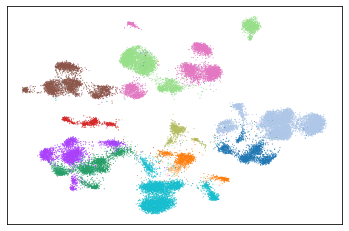

In [7]:
sc.pp.neighbors(X_umap, use_rep='X', random_state=42)
sc.tl.umap(X_umap, random_state=42) 
sc.pl.umap(X_umap,color=["celltype"],title = 'scDBEC',show = False,legend_loc = 'none')
fig, ax = plt.gcf(), plt.gca()
ax.set_xlabel('')
ax.set_ylabel('')
plt.title('')
plt.show()

/root/miniconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


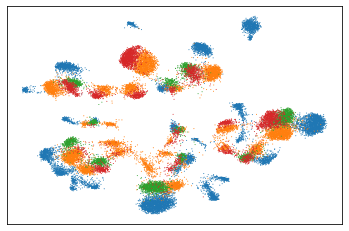

In [8]:
sc.pl.umap(X_umap,color=["BATCH"],title = 'scDBEC',show = False,legend_loc = 'none')
fig, ax = plt.gcf(), plt.gca()
ax.set_xlabel('')
ax.set_ylabel('')
plt.title('')
plt.show()

In [10]:
asw_label, asw_batch, f1 = silhouette(X_umap, 'celltype', 'BATCH', 'X_umap', metric='euclidean')
# ilisi = cal_ilisi(X_umap.obsm['X_umap'], X_umap.obs)
ARI,NMI = calulate_ari_nmi(X_umap,n_cluster=12)
batchkl = BatchKL(X_umap, dimensionData=None, replicates=200, n_neighbors=100, n_cells=100, batch="BATCH")

KeyboardInterrupt: 

In [21]:
batchkl

0.9430338781950109